## 0. Computer vision libraries in PyTorch
<img src="ComVisionLib.png" style="border: 5px solid black; border-radius: 10px;" />

In [1]:
import torch 
from torch import nn 

# Import torch vision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.7.1+cu118
torchvision version: 0.22.1+cu118


## 1. Getting a dataset
- MNIST stands for Modified National Institute of Standards and Technology.
- PyTorch has a bunch of common computer vision datasets stored in torchvision.datasets.
- Including FashionMNIST in torchvision.datasets.FashionMNIST().


- To download it, we provide the following parameters:
1. root: str - which folder do you want to download the data to?
2. train: Bool - do you want the training or test split?
3. download: Bool - should the data be downloaded?
4. transform: torchvision.transforms - what transformations would you like to do on the data?
5. target_transform - you can transform the targets (labels) if you like too.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None 
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False, 
    download = True,
    transform = ToTensor()
)

In [3]:
# See first training sample
img, label = train_data[0]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
img.shape
# [color_channels=1, height=28, width=28]

torch.Size([1, 28, 28])

- There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

- Note: You'll also see NCHW and NHWC formats where N stands for number of images. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

- PyTorch generally accepts NCHW (channels first) as the default for many operators.

- However, PyTorch also explains that NHWC (channels last) performs better and is considered best practice.

In [5]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# See classes
class_names = train_data.classes
class_names, len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

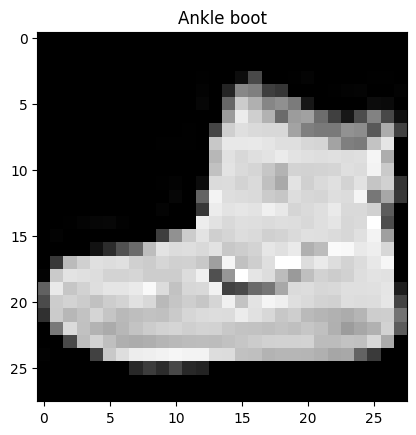

In [7]:
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])

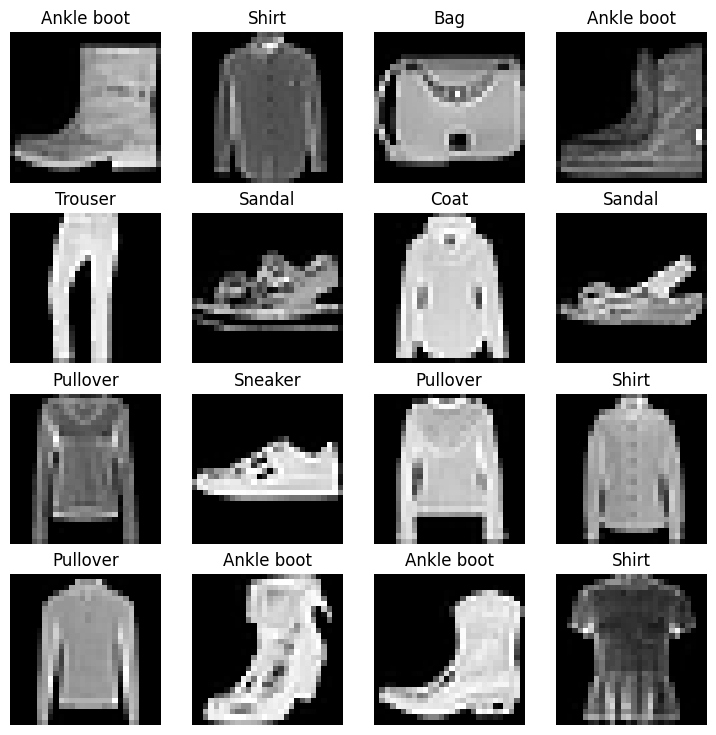

In [8]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

# 2. Prepare DataLoader
- The DataLoader does what you think it might do.

- It helps load data into a model.For training and for inference.

- It turns a large Dataset into a Python iterable of smaller chunks.

- These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32 

train_dataloader = DataLoader(train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(test_data, 
                            batch_size=BATCH_SIZE,
                            shuffle=False)
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000017A6F53E2D0>, <torch.utils.data.dataloader.DataLoader object at 0x0000017A6F2EFB30>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


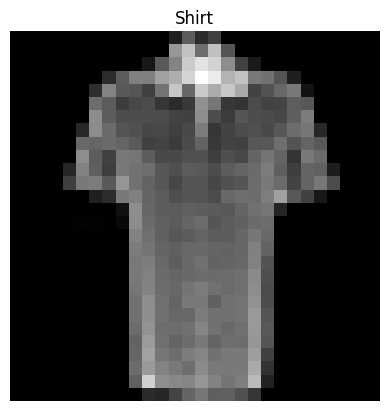

In [11]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [12]:
# Create flatten layer 
# Parameters
## start_dim (int) – first dim to flatten (default = 1).
## end_dim (int) – last dim to flatten (default = -1).

flatten_model = nn.Flatten()
# get a single example
x = train_features_batch[0]

output = flatten_model(x)
# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [13]:
from torch import nn 

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_units: int, hidden_units: int, output_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_units)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [14]:
torch.manual_seed(42)

model0 = FashionMNISTModelV0(
    input_units=784, 
    hidden_units=10, 
    output_units=len(class_names)
)
model0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 3.1 Setup loss, optimizer and evaluation metrics

In [15]:
import requests 
from pathlib import Path 


if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [16]:
from helper_functions import accuracy_fn

# Set up loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

## 3.2 Creating a function to time our experiments

In [17]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None) -> float:
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start 
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [18]:
len(train_dataloader), len(test_dataloader), type(test_dataloader)

(1875, 313, torch.utils.data.dataloader.DataLoader)

## 3.3 Creating a training loop and training a model on batches of data 

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm 

torch.manual_seed(42)
train_time_start_on_cpu  = timer()

epochs = 3 

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training 
    train_loss = 0 

    for batch, (X, y) in enumerate(train_dataloader):
        model0.train()
        # Forward
        y_pred = model0(X)

        # Cal loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss 


        # Backward Prop
        loss.backward()

        # Update params 
        optimizer.step()

        optimizer.zero_grad()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    ### Testing 
    test_loss, test_acc = 0, 0
    model0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # Forward pass 
            test_pred = model0(X)

            # Cal loss 
            test_loss += loss_fn(test_pred, y)

            # Cal acc 
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_time_train = print_train_time(start=train_time_start_on_cpu, 
                                    end=train_time_end_on_cpu,
                                   device=str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 33.578 seconds


## 4. Make predictions and get Model 0 results


In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    loss, acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

model0_results = eval_model(model=model0, data_loader=test_dataloader, 
                            loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [21]:
import torch 

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6. Model 1: Building a better model with non-linearity


In [22]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_units: int, hidden_units: int, output_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_units),
            nn.ReLU()
        )

    def forward(self, x : torch.Tensor):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
model1 = FashionMNISTModelV1(input_units=784, 
                            hidden_units=10, 
                            output_units=len(class_names)).to(device)
next(model1.parameters()).device

device(type='cuda', index=0)

#### 6.1 Setup loss, optimizer and evaluation metrics


In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

#### 6.2 Functionizing training and test loops

In [25]:
def train_step(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device : torch.device = device):
    train_loss, train_acc = 0, 0 
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # send data to GPU
        X, y = X.to(device), y.to(device)

        #Forward pass 
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1))

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [26]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3 

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn
              )
    test_step(model=model1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn
             )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 33.327 seconds


In [27]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
model_1_results 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [44]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    model.to(device)
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [29]:
model0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 7. Model 2: Building a Convolutional Neural Network (CNN)

- A good blog explains about CNN:https://poloclub.github.io/cnn-explainer/ 

In [30]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                     out_channels=hidden_units, 
                     kernel_size=3,
                     stride=1, # default
                     padding=1
                     ), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                     out_channels=hidden_units,
                     kernel_size=3,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, 
                     out_features=output_shape)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)

        return x

In [31]:
torch.manual_seed(42)

model2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model2

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.1 Stepping through nn.Conv2d()
- The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.

- For other dimensional data (such as 1D for text or 3D for 3D objects) there's also nn.Conv1d() and nn.Conv3d().

- This is because our nn.Conv2d() layer expects a 4-dimensional tensor as input with size (N, C, H, W) or [batch_size, color_channels, height, width].

In [32]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_img = images[0]

In [36]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
conv_layer = nn.Conv2d(in_channels=3, 
                      out_channels=10,
                      kernel_size=3,
                      padding=0) # also try using "valid" or "same" here 
# Pass the data through the convolutional layer
conv_layer(test_img), conv_layer(test_img).shape # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

In [35]:
# Add extra dimension to test image
test_img.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [38]:
conv_layer(test_img.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [39]:
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.1471,  0.1597, -0.0451],
                        [ 0.1768, -0.0422,  0.0388],
                        [-0.0937,  0.1130,  0.1697]],
              
                       [[-0.1412,  0.1673,  0.0360],
                        [ 0.1422,  0.0261,  0.0928],
                        [-0.0272,  0.1484,  0.0284]],
              
                       [[-0.0898,  0.0491, -0.0887],
                        [-0.0226, -0.0782,  0.1277],
                        [-0.1519, -0.0887, -0.0543]]],
              
              
                      [[[-0.1157,  0.0182, -0.1901],
                        [ 0.1738, -0.1635,  0.1486],
                        [ 0.0320, -0.0625,  0.1189]],
              
                       [[ 0.0300,  0.1555,  0.0210],
                        [-0.0607,  0.0517, -0.0522],
                        [ 0.0810,  0.1718,  0.1112]],
              
                       [[-0.0841,  0.1111,  0.0344],
                        [ 0.0977

### 7.3 Setup a loss function and optimizer for model_2


In [41]:
# Setup loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=0.1)

In [43]:
torch.manual_seed(42)

# Measure time 
from timeit import default_timer as timer
train_time_start_model2 = timer()

# Train and test model
epochs = 3 
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
              model=model2,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device
              )
    test_step(data_loader=test_dataloader,
             model=model2,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device
             )

train_time_end_model2 = timer()
total_train_time_model2 = print_train_time(start=train_time_start_model2,
                                           end=train_time_end_model2,
                                           device=device)
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.31515 | Train accuracy: 88.70%
Test loss: 0.32848 | Test accuracy: 88.20%

Epoch: 1
---------
Train loss: 0.30393 | Train accuracy: 88.89%
Test loss: 0.32389 | Test accuracy: 88.37%

Epoch: 2
---------
Train loss: 0.29410 | Train accuracy: 89.33%
Test loss: 0.31420 | Test accuracy: 88.70%

Train time on cuda: 41.406 seconds


In [45]:
model2_results = eval_model(
    model=model2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3142046332359314,
 'model_acc': 88.69808306709265}

## 8. Compare model results and training time

In [46]:
import pandas as pd


In [48]:
compare_results = pd.DataFrame([model0_results, model_1_results, model2_results] )
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.314205,88.698083


Text(0, 0.5, 'model')

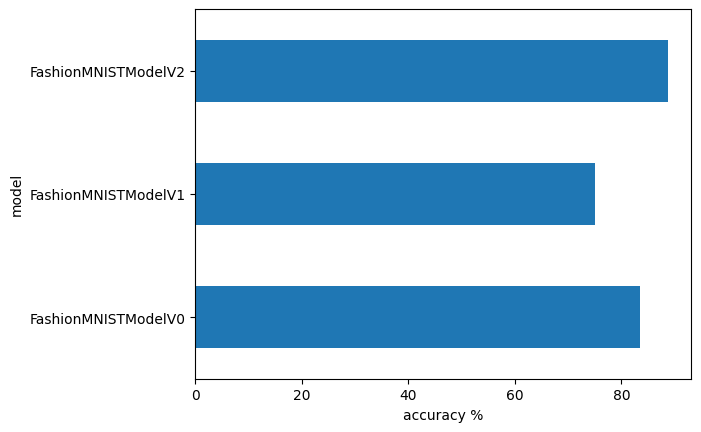

In [58]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [81]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [77]:
import random 
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k =9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")    

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [82]:
pred_probs = make_predictions(model2, data=test_samples)
pred_probs[0:2]

tensor([[8.4649e-07, 2.5990e-09, 3.0499e-08, 4.6085e-09, 6.8803e-08, 9.9980e-01,
         1.7035e-06, 3.8024e-05, 2.5704e-05, 1.3643e-04],
        [8.2203e-03, 2.0750e-01, 9.3595e-04, 1.2745e-01, 7.0403e-02, 1.4292e-04,
         5.8482e-01, 2.2607e-05, 3.1503e-04, 1.8358e-04]])

In [83]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 7, 4, 3, 0, 4, 7, 1])

In [84]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 6, 7, 4, 3, 0, 4, 7, 1]))

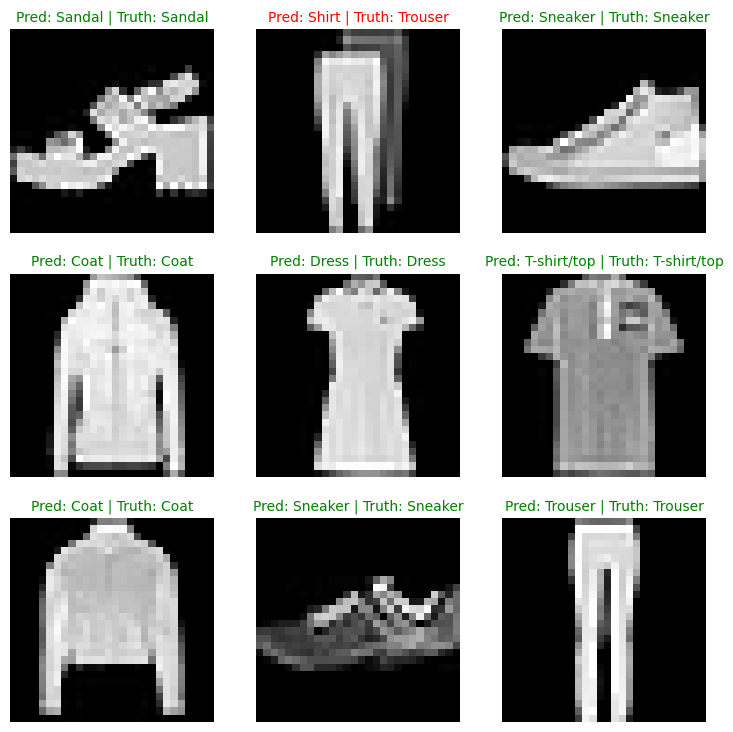

In [85]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3 
ncols = 3
for i, sample in enumerate(test_samples):
    # Create a subplot 
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    # Create a title text
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation
- Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).
- Make a confusion matrix using torchmetrics.ConfusionMatrix.
- Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

In [111]:
from tqdm.auto import tqdm 

y_preds = [] 
model2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making prediction"):
        X, y = X.to(device), y.to(device)
        y_logit = model2(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim = 1)
        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making prediction:   0%|          | 0/313 [00:00<?, ?it/s]

In [107]:
x, y = next(iter(test_dataloader))

In [108]:
x.shape, y.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [114]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
except:
    !pip install -q torchmetrics -U mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.4
Done


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

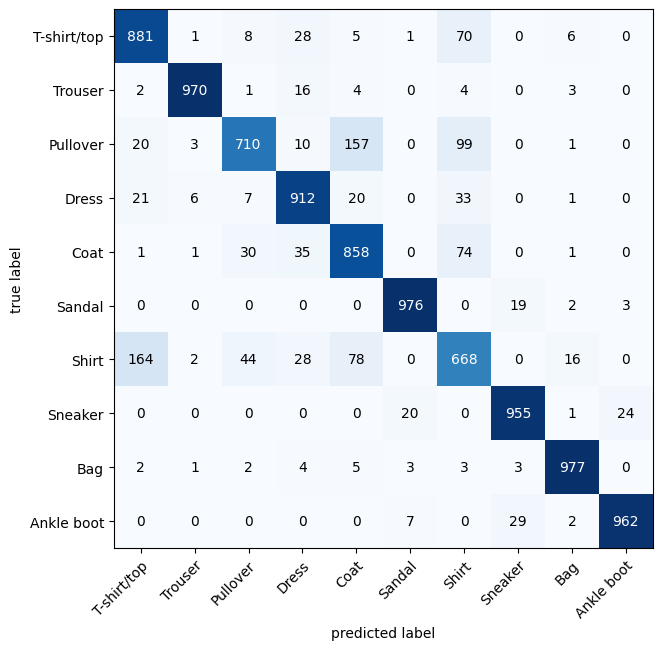

In [116]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# plot confmat
fig, ax = plot_confusion_matrix(confmat_tensor.numpy(), 
                               class_names=class_names,
                               figsize=(10,7))
fig, ax

## 11. Save and load best performing model 


In [118]:
from pathlib import Path 

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, 
                exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model2.state_dict(), f=MODEL_SAVE_PATH)


NameError: name 'DOne' is not defined